In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dissipation as dis
import scipy.special as sp
from scipy.optimize import  fsolve
import scipy.integrate as integrate
import matplotlib.colors as pltc

In [2]:
k_b = 1.380649*10**(-23) # J / K
h_bar = 1.054571*10**(-34) # J s
N_A = 6.022*10**(23)

In [3]:
TN_feps = 118 # K
J = TN_feps*k_b*np.log(2+np.sqrt(3))/2 # J
mu_0 = 4*np.pi*10**(-7) # T m / A
H_E_feps = 69/mu_0 # A / m
H_A_feps = 138/mu_0 # A / m
a_feps = 2*(5.94 + 10)/2 * 10**(-10) # we take the lattice parameter as average of the two (assuming square lattice instead of rectangular)
J_feps = 2
g_feps = 4.54
n_feps = 2.22*10**27
v_feps = 3823

radius = 5*10**-6
thickness = 45*10**-9

mu = 5
E = 103*10**9
nu = 0.304
rho_=3375
tension_buck = 14.682*E*thickness**3/(12*(1-nu**2)*radius**2)

In [4]:
T1 = np.linspace(5, 116, num=117-5).astype(int)
T2 = np.linspace(117, 117.9, num=5)
T3 = np.linspace(118.1, 119, num=5)
T4 = np.linspace(120, 200, num=201-120).astype(int)
T = np.concatenate((T1, T2, np.array([TN_feps]), T3, T4))

c_V = np.loadtxt('data/c_V_calculated.csv', delimiter=',')
c_v_=c_V*(1000/183)

data_kappa_log = np.genfromtxt(r"data/kappa_feps3_log.csv", delimiter=' ')
T_kappa_log = data_kappa_log[:, 0]
kappa_log = data_kappa_log[:, 1]
kappa = np.interp(T, T_kappa_log, kappa_log)

data_alfa_fe = np.genfromtxt(r"data/alpha_feps3.csv", delimiter=' ')
T_alfa_fe = data_alfa_fe[:, 0]
alfa_fe = data_alfa_fe[:, 1]
alfa_FE = np.interp(T,T_alfa_fe,alfa_fe)*3*10**(-5)

alpha =  np.genfromtxt(r"data/alpha_calculated.csv", delimiter=' ')

In [5]:
data = np.genfromtxt(r"data/dissipation_feps3.csv", delimiter=' ')
T_data = data[:, 0]
diss_data = data[:, 1]

data_f = np.genfromtxt(r"data/res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

## Resonant Frequency
We make here the necessary computations of the tension in the membrane to calculate the resonant frequency as a function of temperature

In [6]:
data_f = np.genfromtxt(r"data/alpha_si.csv", delimiter=' ')
T_data_alpha_si = data_f[:, 0]
data_alpha_si = data_f[:, 1]*10**-5

alfa_si = np.interp (T, T_data_alpha_si, data_alpha_si)
alpha_fesi = alpha - alfa_si

def alpha_funct(temper):
    return np.interp(temper,T, alpha/3)

def alpha_fesi_funct(temper):
    return np.interp(temper,T, alpha_fesi/3)

In [7]:
T1 = np.linspace(5, 108, num=109-5).astype(int)
T2 = np.linspace(110, 128, num=50)
T3 = np.linspace(128, 200, num=(201-128)).astype(int)
T_integrate = np.concatenate((T1, T2, T3))
integral_alpha = []
for t in T_integrate:
    integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
integral_alpha = np.array(integral_alpha)
np.savetxt('data\integral_alpha.csv', integral_alpha, delimiter=',')
np.savetxt('data\T_integral_alpha.csv', T_integrate, delimiter=',')

C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_17672\2698966372.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_17672\2698966372.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])


In [8]:
integral_alpha = []
for t in T_integrate:
    integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
integral_alpha = np.array(integral_alpha)
tension_mp = -E*thickness/(1-nu)*integral_alpha
integral_alpha = []
for t in T_integrate:
    integral_alpha.append(-integrate.quad(alpha_fesi_funct, t, T[-1])[0])
integral_alpha = np.array(integral_alpha)
tension_fesi = -E*thickness/(1-nu)*integral_alpha

C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_17672\4087703662.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_17672\4087703662.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_17672\4087703662.py:8: IntegrationWarn

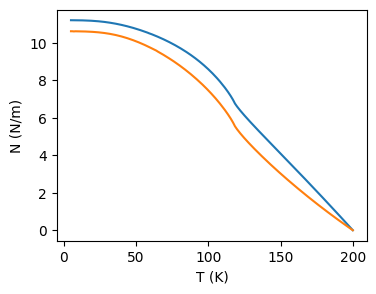

In [9]:
def tension_thick(integral_alpha, thickness, E, nu):
    return -E*thickness/(1-nu)*integral_alpha


fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.plot(T_integrate, tension_mp, label=r'$\alpha$ ($FePS_3$)')
ax.plot(T_integrate, tension_fesi, label=r'$\alpha$ ($FePS_3$-Si)')
ax.set_ylabel('N (N/m)')
ax.set_xlabel('T (K)')
plt.savefig(r'figures/tension.pdf', bbox_inches='tight')
plt.show()


In [10]:
def system_ab(x, D, a, F):
    alpha, beta = x[0], x[1]
    return [alpha * sp.jv(1, alpha) / sp.jv(0, alpha) + beta * sp.iv(1, beta) / sp.iv(0, beta),
            beta ** 2 - alpha ** 2 - a**2*F/D]

def alpha_beta(D, h, a, F):
    F = np.array(F)
    if F.size == 1:
        params = fsolve(system_ab, [3, 4], maxfev=10000, args=(D, a, f))
        return params
    else:
        alpha = []
        beta = []
        for f in F:
            params = fsolve(system_ab, [2.5, 20], maxfev=10000, args=(D, a, f))
            alpha.append(params[0])
            beta.append(params[1])
        return np.array(alpha), np.array(beta)

def omega_tension_pl(thickness, radius, nu, E, rho, tension):
    D = E * thickness ** 3 / (12 * (1 - nu**2))
    alpha, beta = alpha_beta(D, thickness, radius, tension)
    omega = np.sqrt(D / (rho * thickness)) / (2 * radius ** 2) * np.sqrt(
        (alpha ** 2 + beta ** 2) ** 2 - (radius ** 2 * tension / D) ** 2)
    return omega
def omega_tension_mem(thickness, radius, rho, tension):
    return 2.4048/(radius)*np.sqrt(tension/(rho*thickness))


In [11]:
pretension_mem = 8.4
pretension_pl = 6.85
tension = tension_fesi
h = 45*10**-9
a = 5*10**-6

omega_pl = omega_tension_pl(h, a, nu, E, rho_, tension)
omega_pl_pretension = omega_tension_pl(h, a, nu, E, rho_, tension + pretension_pl)
omega_pl_notension = omega_tension_pl(h, a, nu, E, rho_, np.zeros_like(tension))

omega_mem = omega_tension_mem(h, a, rho_, tension)
omega_mem_pretension = omega_tension_mem(h, a, rho_, tension + pretension_mem)
data_f = np.genfromtxt(r"data/res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
T_interp = np.linspace(5, 200, 40)
f0 = np.interp(T_interp, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

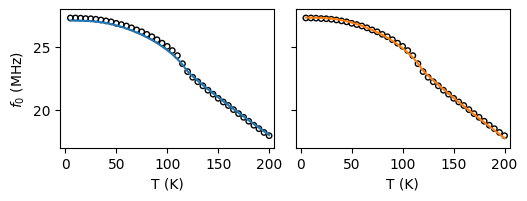

In [12]:
fig, ax = plt.subplots(1,2, figsize=(5.8,1.8),sharey=True)
#ax.plot(T_integrate, omega_mem, label=r'$\omega$ model membrane')
ax[0].plot(T_integrate, omega_mem_pretension*(10**-6)/(2*np.pi))
ax[0].scatter(T_interp,w0*(10**-6)/(2*np.pi), marker='o', s=15, facecolor='none',edgecolor='k')
ax[0].set_ylabel('$f_0$ (MHz)')
ax[0].set_xlabel('T (K)')
ax[0].set_xlim(-5,205)
#ax[0].set_ylim(17.5,28)

ax[1].plot(1, 1)
ax[1].plot(T_integrate, omega_pl_pretension*(10**-6)/(2*np.pi), label=r'$\omega$ plate mod.')
ax[1].scatter(T_interp,w0*(10**-6)/(2*np.pi),marker='o', s=15, facecolor='none',edgecolor='k', label='exp makars')
#ax[1].legend()
ax[1].set_xlabel('T (K)')
ax[1].set_xlim(-5,205)
ax[1].set_ylim(17,28)

plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig(r'figures/f0_makars.pdf', bbox_inches='tight')
plt.show()

Here we start computing the dissipation

In [13]:
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

r = 5*10**(-6)
mu = 5
nu = 0.304
E = 103*10**9
rho_=3375
c_v_=c_V*(1000/183)


Q_rz = dis.dissipation_kz_kr(thickness, r, nu, E, rho_, T, c_v_, kappa, alpha, w0, 200)
Q_what = dis.dissipation_kz_kr(thickness,r, nu, E, rho_, T, c_v_, kappa, alpha, w0, 200)

In [14]:
# We compute the dissipation for different ratios of kappa in plane and kappa out of plane
Q_rz_anis = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa/4, kappa, alpha, w0,200) 
Q_rz_anis_2 = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa/10, kappa, alpha, w0,200) 
Q_rz_anis_3 = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa/20, kappa, alpha, w0,200) 
Q_rz_anis_4 = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa/300, kappa, alpha, w0,200) 
Q_rz_anis_4 = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa/10000, kappa, alpha, w0,200) 
Q_rz_anis_5 = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa, kappa/50000, alpha, w0,200) 

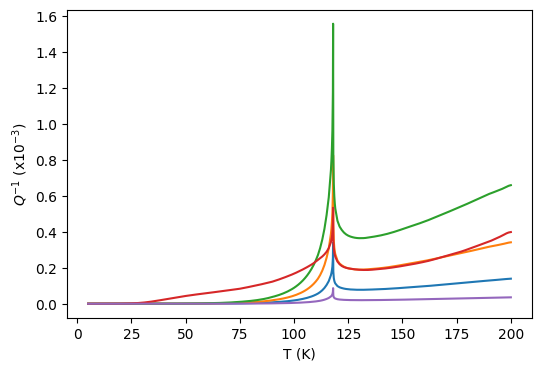

In [16]:
fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
ax.plot(T,Q_rz_anis*1000)
ax.plot(T,Q_rz_anis_2*1000)
ax.plot(T,Q_rz_anis_3*1000)
ax.plot(T,Q_rz_anis_4*1000)
ax.plot(T,Q_rz_anis_5*1000)
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

In [17]:
Q_RZ_ANISOTROPIC = []
f_kr_kz = []
for i in range(20):
    f = 1 / (2*i**2+1)
    f_kr_kz.append(f)
    Q_RZ_ANISOTROPIC.append(dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa*f, kappa, alpha, w0,200))

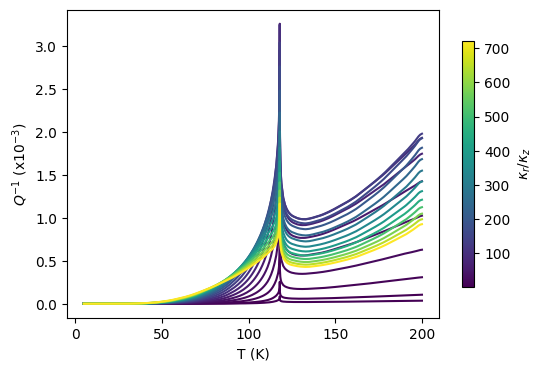

In [18]:
cmap = plt.get_cmap('viridis')
norm = pltc.Normalize(vmin=f_kr_kz[0], vmax=1/f_kr_kz[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
for i in range(20):
    ax.plot(T,Q_RZ_ANISOTROPIC[i]*1000, color=cmap(norm(1/f_kr_kz[i])))
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
cbar = fig.colorbar(sm, ax=ax, label=r'$\kappa_r/\kappa_z$', shrink=0.8)
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

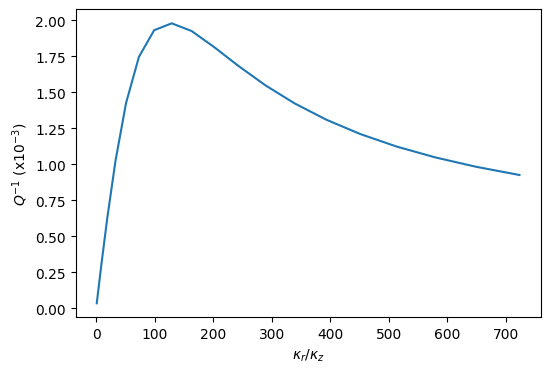

In [19]:
fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
ax.plot(1/np.array(f_kr_kz),np.array(Q_RZ_ANISOTROPIC)[:,-1]*1000)
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel(r'$\kappa_r/\kappa_z$')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

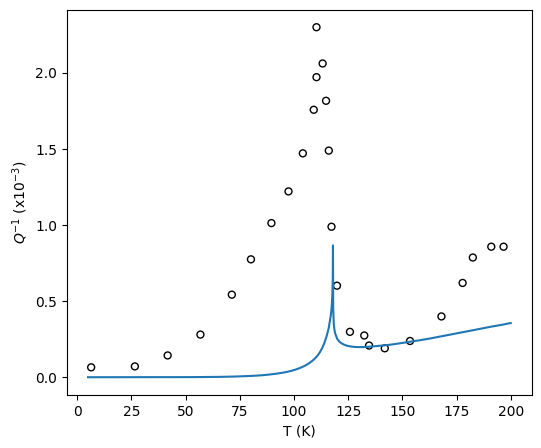

In [22]:
Q_anis_z = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa, kappa*0, alpha, w0, 200) 

fig, ax = plt.subplots(1,1,figsize=(6,5), sharey=True)
ax.plot(T, Q_anis_z*10000)
ax.scatter(T_data, diss_data*10**3,marker='o', s=25, facecolor='none',edgecolor='k')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

# Analysis of the radius dependence of the dissipation

In [23]:
T1 = np.linspace(5, 116, num=117-5).astype(int)
T2 = np.linspace(117, 117.9, num=5)
T3 = np.linspace(118.1, 119, num=5)
T4 = np.linspace(120, 200, num=201-120).astype(int)
T = np.concatenate((T1, T2, np.array([TN_feps]), T3, T4))
data_f = np.genfromtxt(r"data\res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

r=5*10**-6
rho_ = 3375
c_v_ = c_V * (1000/183)

data_kappa_fe = np.genfromtxt(r"data\kappa_feps3.csv", delimiter=' ')
T_k_fe = data_kappa_fe[:, 0]
k_fe = data_kappa_fe[:, 1]
kappa_fe = np.interp(T,T_k_fe,k_fe)
thickness = 45*10**-9
r_x = np.logspace(-7.5, -4.5, 200)
Qs = []
for radius in r_x:
    print(radius)
    w_x = w0*r**2/radius**2
    Q_x = dis.dissipation_kz_kr(thickness, radius, nu, E, rho_, T, c_v_, kappa_fe, alpha, w_x, 300)
    Q = {'r':radius, 'T':T, 'Q':Q_x}
    Q = pd.DataFrame(Q)
    Qs.append(Q_x)

df_Q2 = pd.DataFrame(Qs, columns=T, index=r_x)

3.162277660168379e-08


c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:95: RuntimeWarning: overflow encountered in scalar multiply
  denominator_n = (l_n**2 + m_n**2)**3 * (c1_n**2+c2_n**2) * sp.jv(1,x0_n)**2
c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:94: RuntimeWarning: overflow encountered in scalar multiply
  numerator_n = (d1_n + d2_n - (l_n**4-m_n**4)*(c1_n**2+c2_n**2)*h**3/12) * integral**2
c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:96: RuntimeWarning: invalid value encountered in scalar divide
  sum_n = numerator_n / denominator_n
c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:84: RuntimeWarning: overflow encountered in scalar multiply
  d1_n = (l_n ** 3 - 3 * 

3.2739751361382184e-08


c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:84: RuntimeWarning: overflow encountered in scalar add
  d1_n = (l_n ** 3 - 3 * l_n * m_n ** 2) * (l_n * h / (l_n ** 2 + m_n ** 2) * (c1_n ** 2 + c2_n ** 2) +
c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:86: RuntimeWarning: overflow encountered in scalar add
  2 * (l_n ** 2 - m_n ** 2) / (l_n ** 2 + m_n ** 2) ** 2 * (c1_n * c4_n + c2_n * c3_n))
c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:87: RuntimeWarning: overflow encountered in scalar add
  d2_n = (3 * l_n ** 2 * m_n - m_n ** 3) * (-m_n * h / (l_n ** 2 + m_n ** 2) * (c1_n ** 2 + c2_n ** 2) +
c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:88: Runtim

3.3896179728507914e-08
3.5093455277199855e-08
3.6333020805204414e-08
3.7616370072543935e-08
3.8945049601597946e-08
4.032066054076735e-08
4.17448605939659e-08
4.3219366018265295e-08
4.47459536921003e-08
4.6326463256527594e-08
4.796279933211698e-08
4.9656933814147285e-08
5.141090824887363e-08
5.322683629372798e-08
5.5106906264418985e-08
5.705338377199951e-08
5.906861445308131e-08
6.115502679648502e-08
6.331513506973246e-08
6.555154234890919e-08
6.786694365554642e-08
7.026412920430313e-08
7.274598776536365e-08
7.531551014560009e-08
7.797579279269578e-08
8.073004152657436e-08
8.358157540262826e-08
8.653383071140461e-08
8.959036511956615e-08
9.275486195712056e-08
9.603113465608089e-08
9.942313134590756e-08
1.0293493961127168e-07
1.0657079141786942e-07
1.1033506821222626e-07
1.1423230620163464e-07
1.1826720182059081e-07
1.2244461739031434e-07
1.2676958697817228e-07
1.3124732246407102e-07
1.3588321982112237e-07
1.4068286561815398e-07
1.4565204375190303e-07
1.507967424170009e-07
1.561231613221

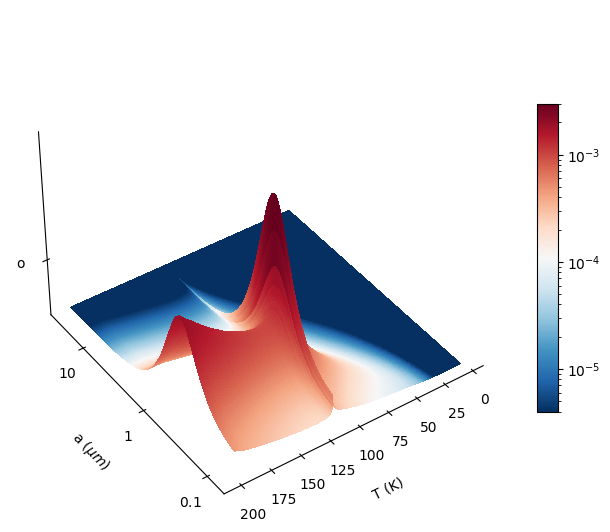

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(8,8))

# Make data.
X, Y = np.meshgrid(r_x, T)
# Plot the surface.
surf = ax.plot_surface(Y, np.log10(X), (np.array(Qs)).T, cmap='RdBu_r',
                       linewidth=0, antialiased=False,rcount=500, ccount=500, norm=pltc.LogNorm(4*10**(-6),0.003))
ax.view_init(azim=-65+120, elev=40)

y_ticks = [-7, -6, -5]  # Define the tick positions
y_tick_labels = ['$0.1$', '$1$', '$10$']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_ylim(-7.2,-4.5)
ax.set_xlabel('T (K)', labelpad=10)
ax.set_ylabel('a $(\mu m)$', labelpad=10)
ax.invert_yaxis()


z_ticks = [0.001]  # Define the tick positions
z_tick_labels = ['o']
ax.set_zticks(z_ticks)
ax.set_zticklabels(z_tick_labels)

ax.grid(False)
fig.colorbar(surf, shrink=0.5, aspect=15)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

plt.show()

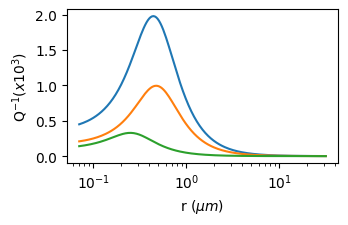

In [26]:
fig, ax = plt.subplots(1,1, figsize=(3.5,2))
ax.plot(r_x*10**6, 1000*np.array(Qs)[:,-1])
ax.plot(r_x*10**6, 1000*np.array(Qs)[:,-71])
ax.plot(r_x*10**6, 1000*np.array(Qs)[:,-119])
ax.set_xscale('log')
ax.set_xlabel('r $(\mu m)$')
ax.set_ylabel('Q$^{-1} (x10^3)$')
plt.show()

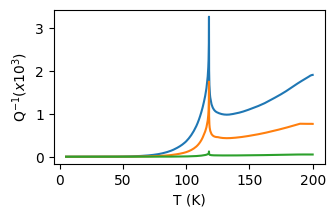

In [27]:
fig, ax = plt.subplots(1,1, figsize=(3.5,2))
ax.plot(T, 1000*np.array(Qs)[-120,:])
ax.plot(T, 1000*np.array(Qs)[-100,:])
ax.plot(T, 1000*np.array(Qs)[-60,:])
ax.set_xlabel('T (K)')
ax.set_ylabel('Q$^{-1} (x10^3)$')
plt.show()

## Radius dependence but for anisotropic kappa

In [30]:
T1 = np.linspace(5, 116, num=117-5).astype(int)
T2 = np.linspace(117, 117.9, num=5)
T3 = np.linspace(118.1, 119, num=5)
T4 = np.linspace(120, 200, num=201-120).astype(int)
T = np.concatenate((T1, T2, np.array([TN_feps]), T3, T4))
data_f = np.genfromtxt(r"data\res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

r=5*10**-6
rho_ = 3375
c_v_ = c_V * (1000/183)
data_kappa_fe = np.genfromtxt(r"data\kappa_feps3.csv", delimiter=' ')
T_k_fe = data_kappa_fe[:, 0]
k_fe = data_kappa_fe[:, 1]
kappa_fe = np.interp(T,T_k_fe,k_fe)
kappa_r = kappa_fe*(2.7/1.35)
kappa_z = kappa_fe*(0.85/1.35)
thickness = 45*10**-9
r_x = np.logspace(-8.035,-3.035,200)
Q_RZ_ANIS = []
for radius in r_x:
    print(radius)
    w_x = w0*r**2/radius**2
    Q_x = dis.dissipation_kz_kr_anis(thickness, radius, nu, E, rho_, T, c_v_, kappa_r, kappa_z, alpha, w_x,200)
    Q = {'r':radius, 'T':T, 'Q':Q_x}
    Q = pd.DataFrame(Q)
    Q_RZ_ANIS.append(Q_x)

9.225714271547628e-09


c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:146: RuntimeWarning: overflow encountered in scalar multiply
  denominator_n = (l_n**2 + m_n**2)**3 * (c1_n**2+c2_n**2) * sp.jv(1,x0_n)**2
c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:145: RuntimeWarning: overflow encountered in scalar multiply
  numerator_n = (d1_n + d2_n - (l_n**4-m_n**4)*(c1_n**2+c2_n**2)*h**3/12) * integral**2
c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:147: RuntimeWarning: invalid value encountered in scalar divide
  sum_n = numerator_n / denominator_n
c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\dissipation.py:135: RuntimeWarning: overflow encountered in scalar multiply
  d1_n = (l_n ** 3 - 

9.775199467525055e-09
1.0357412100285313e-08
1.0974301421830466e-08
1.1627932781961272e-08
1.2320494543082965e-08
1.3054305406857862e-08
1.3831822177235082e-08
1.4655647985847291e-08
1.5528541007314003e-08
1.645342369362942e-08
1.7433392558552578e-08
1.8471728544757005e-08
1.9571908008450208e-08
2.073761435823849e-08
2.1972750387205257e-08
2.3281451339489482e-08
2.4668098755112592e-08
2.6137335139405005e-08
2.7694079506147127e-08
2.9343543846461767e-08
3.109125057859765e-08
3.2943051037024166e-08
3.490514506274101e-08
3.698410176038902e-08
3.9186881491659424e-08
4.15208591786333e-08
4.399384899507339e-08
4.661413052833228e-08
4.939047649946999e-08
5.2332182134385245e-08
5.544909628429813e-08
5.8751654399772656e-08
6.225091346867971e-08
6.595858903506957e-08
6.988709442289697e-08
7.40495822959163e-08
7.845998869289374e-08
8.313307968556212e-08
8.808450081553462e-08
9.333082947568708e-08
9.888963041138769e-08
1.0477951452738703e-07
1.1102020119725986e-07
1.1763258428400553e-07
1.24638802

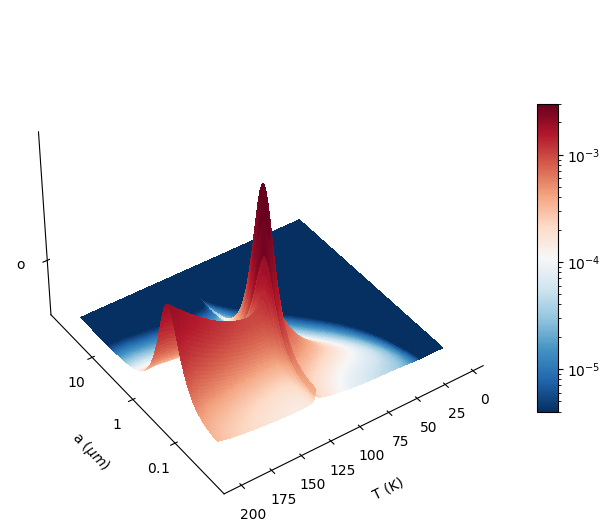

In [31]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(8,8))
start = -50
# Make data.
X, Y = np.meshgrid(r_x[:start], T)
# Plot the surface.
surf = ax.plot_surface(Y, np.log10(X), (np.array(Q_RZ_ANIS)[:start,:]).T, cmap='RdBu_r',
                       linewidth=0, antialiased=False,rcount=500, ccount=500, norm=pltc.LogNorm(4*10**(-6),0.003))
ax.view_init(azim=-65+120, elev=40)


ax.set_ylim(-8.035,-4.035)
y_ticks = [-7, -6, -5]  # Define the tick positions
y_tick_labels = ['$0.1$', '$1$', '$10$']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_xlabel('T (K)', labelpad=10)
ax.set_ylabel('a $(\mu m)$', labelpad=10)
ax.invert_yaxis()


z_ticks = [0.001]  # Define the tick positions
z_tick_labels = ['o']
ax.set_zticks(z_ticks)
ax.set_zticklabels(z_tick_labels)

ax.grid(False)
fig.colorbar(surf, shrink=0.5, aspect=15)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

plt.show()

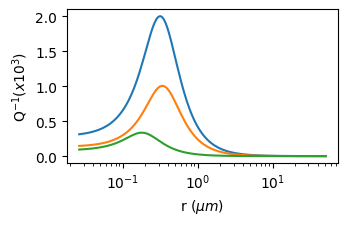

In [32]:
fig, ax = plt.subplots(1,1, figsize=(3.5,2))
ax.plot(r_x[:start]*10**6, 1000*np.array(Q_RZ_ANIS)[:start,-1])
ax.plot(r_x[:start]*10**6, 1000*np.array(Q_RZ_ANIS)[:start,-71])
ax.plot(r_x[:start]*10**6, 1000*np.array(Q_RZ_ANIS)[:start,-119])
ax.set_xscale('log')
ax.set_xlabel('r $(\mu m)$')
ax.set_ylabel('Q$^{-1} (x10^3)$')
plt.show()


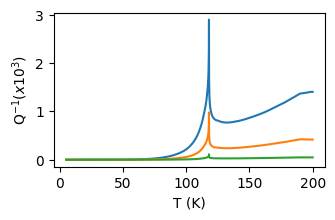

In [33]:
fig, ax = plt.subplots(1,1, figsize=(3.5,2))
ax.plot(T, 1000*np.array(Q_RZ_ANIS)[-131,:])
ax.plot(T, 1000*np.array(Q_RZ_ANIS)[-119,:])
ax.plot(T, 1000*np.array(Q_RZ_ANIS)[-100,:])
ax.set_xlabel('T (K)')
ax.set_ylabel('Q$^{-1} (x10^3)$')
plt.show()